In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import io
import base64

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import tqdm 

**Instruções gerais:** Sua submissão <u>deve</u> conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" em um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'--- submetendo um <u>único pdf</u>.

# Trabalho de casa 06: Redes neurais

**1.** O código abaixo baixa e carrega o banco de dados CIFAR10, que contém diversas imagens RGB de 10 classes distintas. Além disso, os dados já estão separados em um objeto que provê batches de treino, teste e validação. Também provemos um exemplo de como definir um modelo em pytorch (você é livre para modifica-lo e facilitar sua vida), bem como um exemplo de como carregar batches. Treine uma CNN para resolver o problema --- fazendo uma busca de hiper-parâmetros razoável baseada no erro de validação. Consulte a documentação do pytorch para entender o que cada função na definição da CNN faz. Reporte os resultados do modelo escolhido no conjunto de teste, bem como suas curvas de aprendizado. Além disso, mostre como os dados de entrada são transformados ao longo das camadas (plote as figuras intermerdiárias para alguns inputs da sua escolha) e comente. 

cpu
Files already downloaded and verified
Files already downloaded and verified


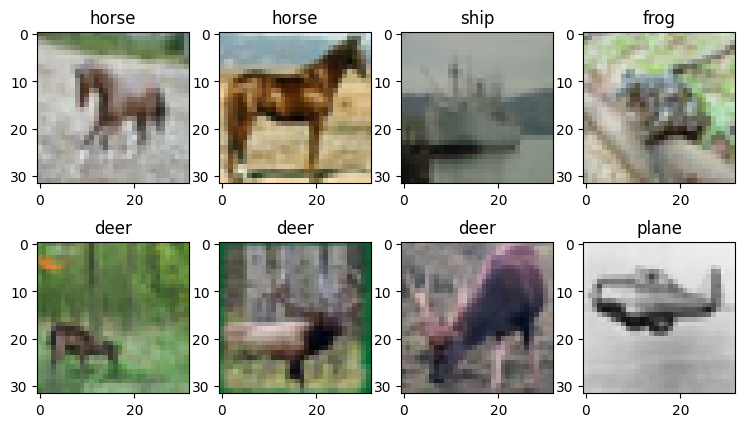

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

# The batch size
batch_size = 2048 

transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_set = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True,
    transform=transform_train,
)
test_set = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True,
    transform=transform_test
)

train_loader = DataLoader(
    train_set, batch_size=batch_size, shuffle=True,
    num_workers=2
)
test_loader = DataLoader(
    test_set, batch_size=batch_size, shuffle=True,
    num_workers=2
)

classes = (
    'plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
)

n_img = 8

f, ax = plt.subplots(2, 4, figsize=(9,5))
dataiter = iter(test_loader)
images, labels = next(dataiter)

for i in range(n_img):
    npimg = images[i]/2 + 0.5
    npimg = npimg.numpy()
    ax[i%2,i//2].imshow(np.transpose(npimg, (1, 2, 0)))
    ax[i%2,i//2].set_title(classes[labels[i]])
plt.show()


In [3]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.LazyLinear(120)
        #self.fc1 = nn.LazyLinear(16 * 5 * 5, 120) 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=0.001)


for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    aux = 0
    for data in train_loader:
        if aux == 0 and epoch == 0:
            print('this is how to load a training batch')
        aux += 1


C:\Users\ilana\.julia\conda\3\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


this is how to load a training batch


In [9]:
# Definição de hiper-parâmetros
lrs = [0.01, 0.001]
filter_sizes = [3, 5, 6]
epochs = 5

# Defina a perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

# Registrar a perda e a precisão para treinamento e teste
train_loss, val_loss = [], []
train_acc, val_acc = [], []


class CNN(nn.Module):
    def __init__(self, filter_size):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, filter_size)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, filter_size)
        self.fc1 = nn.LazyLinear(120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Variáveis para guardar os melhores hiper-parâmetros e a acurácia correspondente
best_lr = 0.0
best_filters = 0
best_acc = 0.0
best_model = None

# Iterar sobre todas as combinações de hiperparâmetros
for lr in lrs:
    for filter_size in filter_sizes:
        print(f'Treinando com lr={lr}, filter_size={filter_size}')
        
        # Inicializar modelo, perda e otimizador para essa combinação de hiperparâmetros
        cnn = CNN(filter_size).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

        # Treinamento do Modelo
        for epoch in range(epochs):
            running_loss = 0
            correct, total = 0, 0 

            for data in train_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                
                optimizer.zero_grad()
                
                outputs = cnn(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            train_loss.append(running_loss/total)
            train_acc.append(100 * correct / total)

            # Validação do modelo
            with torch.no_grad():
                correct, total = 0, 0
                val_running_loss = 0

                for data in test_loader:
                    inputs, labels = data[0].to(device), data[1].to(device)
                    
                    outputs = cnn(inputs)
                    loss = criterion(outputs, labels)
                    
                    val_running_loss += loss.item()

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                val_loss.append(val_running_loss/total)
                val_acc.append(100 * correct / total)

            print(f'Epoch: {epoch+1}/{epochs}, Training Loss: {running_loss/total:.3f}, Training Accuracy: {100 * correct / total:.3f}, Validation Loss: {val_running_loss/total:.3f}, Validation Accuracy: {100 * correct / total:.3f}')

        # Verificar se esta combinação de hiperparâmetros é a melhor até agora
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            best_lr = lr
            best_filters = filter_size
            best_model = cnn

print(f'Melhores hiperparâmetros: lr={best_lr}, filter_size={best_filters}, acc={best_acc}')

Treinando com lr=0.01, filter_size=3
Epoch: 1/5, Training Loss: 0.005, Training Accuracy: 36.700, Validation Loss: 0.001, Validation Accuracy: 36.700
Epoch: 2/5, Training Loss: 0.004, Training Accuracy: 44.740, Validation Loss: 0.001, Validation Accuracy: 44.740
Epoch: 3/5, Training Loss: 0.004, Training Accuracy: 50.330, Validation Loss: 0.001, Validation Accuracy: 50.330
Epoch: 4/5, Training Loss: 0.003, Training Accuracy: 53.540, Validation Loss: 0.001, Validation Accuracy: 53.540
Epoch: 5/5, Training Loss: 0.003, Training Accuracy: 55.270, Validation Loss: 0.001, Validation Accuracy: 55.270
Treinando com lr=0.01, filter_size=5
Epoch: 1/5, Training Loss: 0.005, Training Accuracy: 31.790, Validation Loss: 0.001, Validation Accuracy: 31.790
Epoch: 2/5, Training Loss: 0.004, Training Accuracy: 42.280, Validation Loss: 0.001, Validation Accuracy: 42.280
Epoch: 3/5, Training Loss: 0.004, Training Accuracy: 46.710, Validation Loss: 0.001, Validation Accuracy: 46.710
Epoch: 4/5, Training L

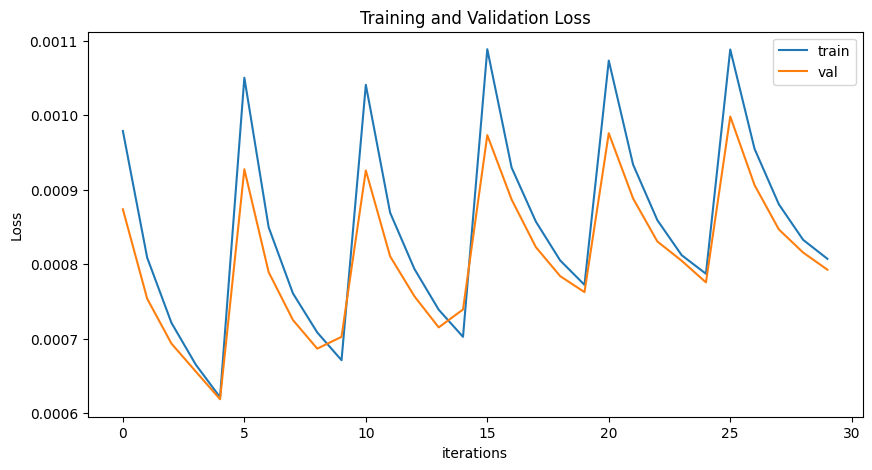

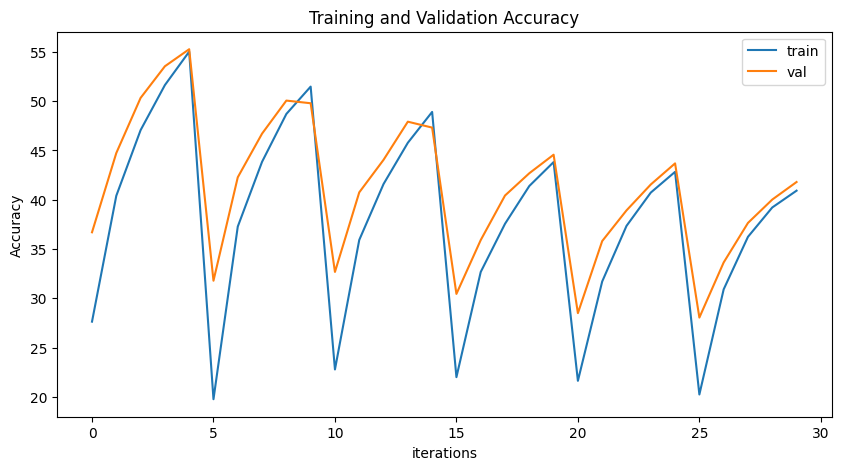

In [10]:
# Curva de Aprendizado de Perdas
plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(train_loss,label="train")
plt.plot(val_loss,label="val")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Curva de Aprendizado de Acurácia
plt.figure(figsize=(10,5))
plt.title("Training and Validation Accuracy")
plt.plot(train_acc,label="train")
plt.plot(val_acc,label="val")
plt.xlabel("iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# Avaliação final
cnn.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = cnn(inputs)
        predito = outputs.argmax(dim=1)
        y_true += labels.cpu().numpy().tolist()
        y_pred += predito.cpu().numpy().tolist()

y_true = np.array(y_true)
y_pred = np.array(y_pred)

acuracia = (y_true == y_pred).mean()
print(f"Acurácia: {acuracia}")

Acurácia: 0.418


A acurácia não ficou muito boa. Aumentando o  número de épocas e camadas de convolução:

In [16]:
# Definição de hiper-parâmetros
lrs = [0.01, 0.001]
filter_sizes = [3, 5, 6]

# Aumentando o número de épocas
epochs = 10

class CNN(nn.Module):
    def __init__(self, filter_size):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, filter_size)
        self.conv2 = nn.Conv2d(6, 16, filter_size)
        self.conv3 = nn.Conv2d(16, 32, filter_size) # Adicionando uma nova camada de convolução
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.LazyLinear(120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x))) # Passando pelo novo bloco de convolução
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Variáveis para guardar os melhores hiper-parâmetros e a acurácia correspondente
best_lr = 0.0
best_filters = 0
best_acc = 0.0
best_model = None

# Iterar sobre todas as combinações de hiperparâmetros
for lr in lrs:
    for filter_size in filter_sizes:
        print(f'Treinando com lr={lr}, filter_size={filter_size}')
        
        # Inicializar modelo, perda e otimizador para essa combinação de hiperparâmetros
        cnn = CNN(filter_size).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

        # Treinamento do Modelo
        for epoch in range(epochs):
            running_loss = 0
            correct, total = 0, 0 

            for data in train_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                
                optimizer.zero_grad()
                
                outputs = cnn(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            train_loss.append(running_loss/total)
            train_acc.append(100 * correct / total)

            # Validação do modelo
            with torch.no_grad():
                correct, total = 0, 0
                val_running_loss = 0

                for data in test_loader:
                    inputs, labels = data[0].to(device), data[1].to(device)
                    
                    outputs = cnn(inputs)
                    loss = criterion(outputs, labels)
                    
                    val_running_loss += loss.item()

                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                val_loss.append(val_running_loss/total)
                val_acc.append(100 * correct / total)

            print(f'Epoch: {epoch+1}/{epochs}, Training Loss: {running_loss/total:.3f}, Training Accuracy: {100 * correct / total:.3f}, Validation Loss: {val_running_loss/total:.3f}, Validation Accuracy: {100 * correct / total:.3f}')

        # Verificar se esta combinação de hiperparâmetros é a melhor até agora
        if val_acc[-1] > best_acc:
            best_acc = val_acc[-1]
            best_lr = lr
            best_filters = filter_size
            best_model = cnn

print(f'Melhores hiperparâmetros: lr={best_lr}, filter_size={best_filters}, acc={best_acc}')    

Treinando com lr=0.01, filter_size=3
Epoch: 1/10, Training Loss: 0.005, Training Accuracy: 30.380, Validation Loss: 0.001, Validation Accuracy: 30.380
Epoch: 2/10, Training Loss: 0.004, Training Accuracy: 38.210, Validation Loss: 0.001, Validation Accuracy: 38.210
Epoch: 3/10, Training Loss: 0.004, Training Accuracy: 41.250, Validation Loss: 0.001, Validation Accuracy: 41.250
Epoch: 4/10, Training Loss: 0.004, Training Accuracy: 45.510, Validation Loss: 0.001, Validation Accuracy: 45.510
Epoch: 5/10, Training Loss: 0.004, Training Accuracy: 48.090, Validation Loss: 0.001, Validation Accuracy: 48.090
Epoch: 6/10, Training Loss: 0.003, Training Accuracy: 48.720, Validation Loss: 0.001, Validation Accuracy: 48.720
Epoch: 7/10, Training Loss: 0.003, Training Accuracy: 52.370, Validation Loss: 0.001, Validation Accuracy: 52.370
Epoch: 8/10, Training Loss: 0.003, Training Accuracy: 55.000, Validation Loss: 0.001, Validation Accuracy: 55.000
Epoch: 9/10, Training Loss: 0.003, Training Accurac

RuntimeError: Given input size: (32x1x1). Calculated output size: (32x0x0). Output size is too small

A terceira camada de convolução deixou a dimensão muito pequena. Infelizmente não deu tempo de ajeitar :(

Epoch: 0, Loss:53.494
Epoch: 1, Loss:45.205
Epoch: 2, Loss:40.627
Epoch: 3, Loss:38.470
Epoch: 4, Loss:36.198
Epoch: 5, Loss:34.556
Epoch: 6, Loss:33.786
Epoch: 7, Loss:32.649
Epoch: 8, Loss:31.288
Epoch: 9, Loss:30.457


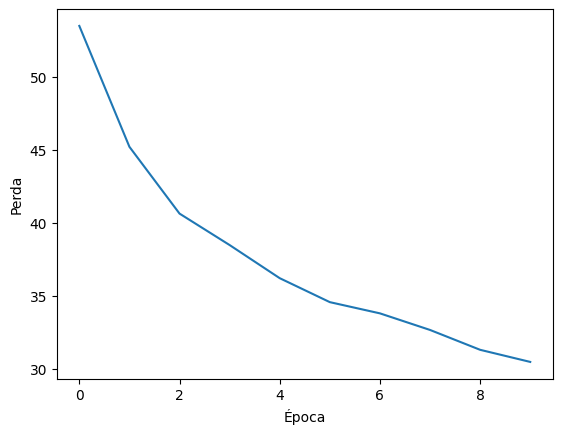

In [20]:
cnn = CNN(best_filters).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=best_lr)

losses = []

for epoch in range(10):  
    
    aux = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = cnn(inputs)
        loss = criterion(outputs, labels)

        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

        aux += loss.item()

    losses.append(aux)

    print(f'Epoch: {epoch}, Loss:{aux:.3f}')

plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

Epoch: 0, Loss:53.872
Epoch: 1, Loss:46.216
Epoch: 2, Loss:41.312
Epoch: 3, Loss:39.225
Epoch: 4, Loss:36.750
Epoch: 5, Loss:35.005
Epoch: 6, Loss:33.926
Epoch: 7, Loss:33.372
Epoch: 8, Loss:31.737
Epoch: 9, Loss:30.590
Epoch: 10, Loss:30.230
Epoch: 11, Loss:29.240
Epoch: 12, Loss:28.879
Epoch: 13, Loss:27.923
Epoch: 14, Loss:27.872
Epoch: 15, Loss:27.664
Epoch: 16, Loss:26.866
Epoch: 17, Loss:26.747
Epoch: 18, Loss:26.329
Epoch: 19, Loss:26.254


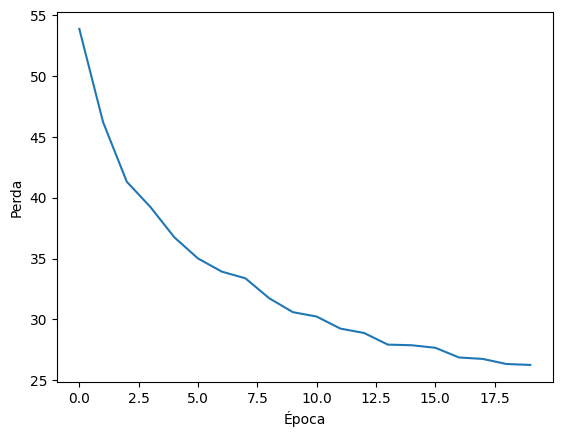

In [21]:
cnn = CNN(best_filters).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=best_lr)

losses = []

for epoch in range(20):  
    
    aux = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = cnn(inputs)
        loss = criterion(outputs, labels)

        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

        aux += loss.item()

    losses.append(aux)

    print(f'Epoch: {epoch}, Loss:{aux:.3f}')

plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

In [23]:
import random

random.randint(10, 100)

47

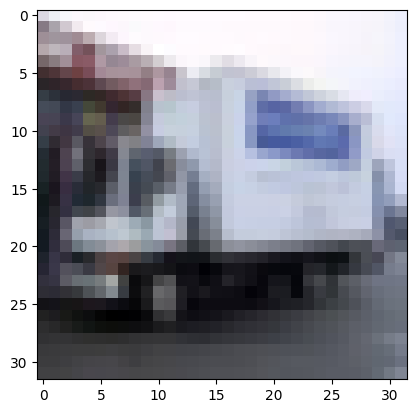

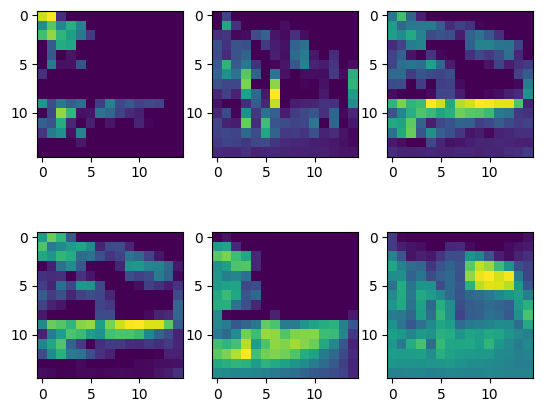

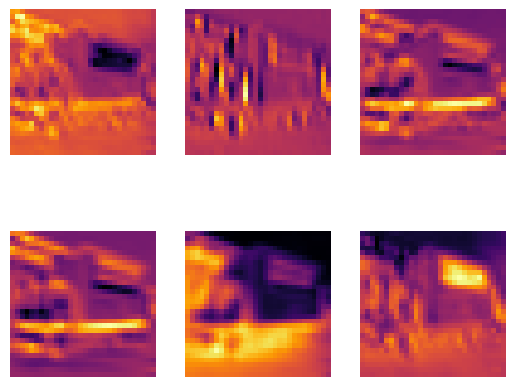

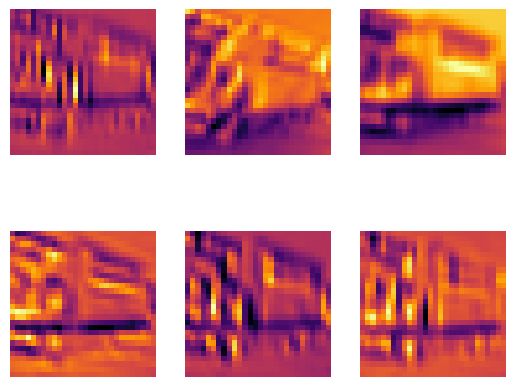

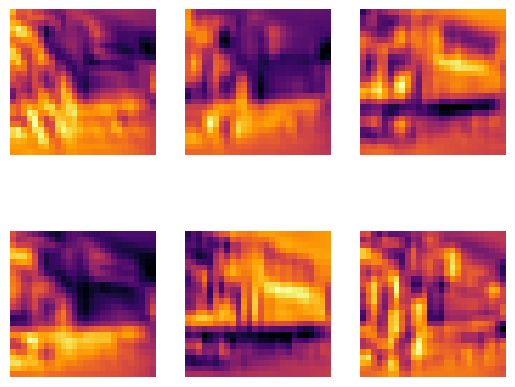

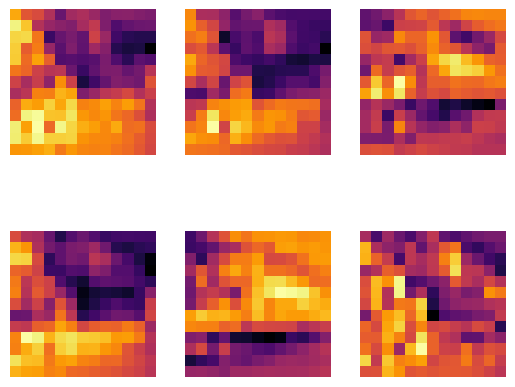

In [25]:
def visualize_activations(model, image):
    layers = [layer for layer in model.children() if isinstance(layer, (nn.Conv2d, nn.MaxPool2d))] 
    image = image.unsqueeze(0) # Adiciona uma dimensão extra à imagem representando o batch size

    for idx, layer in enumerate(layers):
        image = layer(image) 
        num_channels = min(6, image.shape[1])  

        plt.figure(idx+2)
        for ch in range(num_channels):
            plt.subplot(2, 3, ch+1)
            plt.imshow(image[0, ch].detach().cpu().numpy(), cmap='inferno')
            plt.axis('off')
        plt.subplots_adjust(hspace=0.5)
        plt.show()

# image = random.choice(list(input for input, label in test_set if label == 9))
# image = image.to(device)

image = list(input for input, label in test_set if label == 9)
image = image[47].to(device)

plt.figure(1)
plt.imshow((image.cpu().numpy()/2+0.5).transpose(1, 2, 0))
plt.show()

with torch.no_grad():
    
    conv1_result = cnn.pool(F.relu(cnn.conv1(image)))
    conv1_result_np = conv1_result.cpu().numpy()

    plt.figure(2)
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(conv1_result_np[i])
        plt.subplots_adjust(hspace=0.5)

    conv2_result = cnn.pool(F.relu(cnn.conv2(conv1_result)))
    conv2_result_np = conv2_result.cpu().numpy()
    
    conv3_result = cnn.pool(F.relu(cnn.conv3(conv2_result)))
    conv3_result_np = conv3_result.cpu().numpy()

#     plt.figure(3)
#     for i in range(cnn.conv2.out_channels):
#         plt.subplot(4, 4, i+1)
#         plt.imshow(conv2_result_np[i])

    plt.show()

visualize_activations(cnn, image)

No resultado da visualização, é possível identificar as ativações de cada camada através das regiões mais claras de cada imagem, onde cada filtro captura uma diferente característica, assim como a redução da dimensionalidade  

# Exercício de "papel e caneta"

**1.** Na aula discutimos como CNNs podem ser vistas como casos especiais de MLPs. Com isso em mente, mostre que i) camadas convolucionais podem ser escritas como uma transformação linear seguida por uma transformação não linear; e ii) camadas de pooling de média ou soma podem ser escritas como transformações lineares. 

i) Primeiro, devemos ter em mente que uma camada convolucional irá abstrair os dados de entrada com um tamanho específico para um feature map aplicando um filtro (kernel) a esses dados de entrada. Isso significa que podemos assumir os dados de entrada de uma CNN como uma matriz $n \times n$, onde cada elemento da matriz será 0 ou 1. Assim, haverão filtros na camada de convolução que também podem ser considerados matrizes, digamos $l \times l, l < n$, que irão passar sobre a matriz original em passos de tamanho especificados previamente, e cada elemento da matriz de filtro servirá como um parâmetro da rede neural, que não são baseados nos dados iniciais mas sim obtidos através dos dados de treinamento. Assim temos a matriz $X$ dos dados originais $n \times n$ e um filtro $F$ de tamanho $l \times l$, e o mapa de features $A$ é dado da seguinte forma:

$$A = (F \times X), $$

que por sua vez é uma transformação linear, pois satisfaz as propriedades de aditividade e homogeneidade:

Aditividade: considerando duas matrizes de entrada $X_1$ e $X_2$ e o filtro $F$, e seja $C(X, F)$ a operação de convolução de $X$ com $F$, somando as matrizes de entrada e aplicando a convolução, o resultado deve ser o mesmo que se aplicarmos a convolução individualmente e então somarmos os resultados. Isto é:

$$C(X_1 + X_2, F) = C(X_1, F) + C(X_2, F) = \\
(F * (X_1 + X_2))(t) = (F * X_1)(t) + (F * X_2)(t) = \\
\int_{-\infty}^{\infty}F(\tau)(X_1+X_2)(t-\tau) d\tau =  \int_{-\infty}^{\infty}F(\tau)X_1(t-\tau) d\tau + \int_{-\infty}^{\infty}F(\tau)X_2(t-\tau) d\tau,$$

pela definição de convolução, e por causa da linearidade da integral, os dois lados dessa equação são iguais, então a aditividade é provada.

Homogeneidade: se multiplicarmos $X_1$ por um escalar $c$ e depois aplicarmos a convolução, o resultado deve ser o mesmo que se aplicarmos a convolução e então multiplicarmos o resultado pelo escalar. Isto é:

$$C(cX_1, F) = cC(X_1, F) = \\
(F * (cX))(t) = c(F * X)(t) = \\
\int_{-\infty}^{\infty}F(\tau)(cX)(t-\tau) d\tau = c\int_{-\infty}^{\infty}F(\tau)X(t-\tau) d\tau,$$

e como $c$ é constante, dado que a integral de uma função multiplicada por uma constante é igual à constante multiplicada pela integral da função, os dois lados dessa equação são iguais, então a homogeneidade é provada, logo a operação de convolução é uma transformação linear por satisfazer as propriedades de aditividade e homogeneidade.

Tendo isso, após a transformação linear, uma função de ativação é aplicada ao feature map obtido. Essa função tem um papel fundamental nas CNNs, por decidir se um neurônio deve ser ativado ou ignorado. Uma das mais comuns é a ReLU (Rectified Linear Unit), que performa uma transformação não-linear:

$$R(z) = z^+ = max(0, z),$$

onde $z$ é o elemento de saída da camada de convolução anterior, e todos os valores negativos dos feature maps prévios serão substituídos por 0. Com isso, o output após a camada ReLU, que tem uma estrutura de rede idêntica ao feature map da camada convolucional anterior, será usado como input da próxima camada convolucional. Sendo assim, mostramos que camadas convolucionais podem ser escritas como uma transformação linear seguida de uma não-linear. 

ii) Uma limitação do output dos feature maps das camadas convolucionais é que eles registram a posição precisa das features no input. Isso significa que pequenos movimentos na posição da feature na imagem de entrada irão resultar em um feature map diferente. Isso pode acontecer com recorte, rotação, deslocamento e outras pequenas alterações na imagem de entrada. Uma forma comum de solucionar esse problema é a redução da amostragem (down sampling), onde uma versão de baixa resolução de um sinal de entrada é criado, contendo os elementos estruturais de maior importância, quando detalhes mais refinados podem não ser tão úteis para a tarefa. Isso costuma ser feito através de uma camada de pooling. Essa camada opera sobre cada feature map separadamente, criando um novo conjunto com o mesmo número de "pooled feature maps", reduzindo cada feature map por um fator de 2, ou seja, reduzindo a dimensão pela metade e portanto reduzindo o número de pixels ou valores do feature map para um quarto do original. 

Verificando agora que a operação de pooling de média e soma podem ser escritas como transformações lineares, podemos considerar a operação de pooling de média e soma como uma convolução especial com um filtro $P$ onde todos os elementos são iguais a $1/n^2$ para média ou $1$ para soma, onde $n$ é o tamanho da janela de pooling. Novamente, ela será uma convolução caso satisfaça as propriedades de aditividade e homogeneidade:

Para a operação de pooling de média e soma, precisamos mostrar que $P_m(X_1 + X_2, P_m) = P_m(X_1, P_m) + P_m(X_2, P_m)$ e $P_s(X_1 + X_2, P_s) = P_s(X_1, P_s) + P_s(X_2, P_s)$, respectivamente.

Reescrevendo como $(P_m * (X_1 + X_2))(t) = (P_m * X_1)(t) + (P_m * X_2)(t)$ e $(P_s * (X_1 + X_2))(t) = (P_s * X_1)(t) + (P_s * X_2)(t)$ e substituindo na definição de convolução, provaremos a aditividade:

$$\int_{-\infty}^{\infty}P_m(\tau)(X_1+X_2)(t-\tau) d\tau =  \int_{-\infty}^{\infty}P_m(\tau)X_1(t-\tau) d\tau + \int_{-\infty}^{\infty}P_m(\tau)X_2(t-\tau) d\tau \\
\int_{-\infty}^{\infty}P_s(\tau)(X_1+X_2)(t-\tau) d\tau =  \int_{-\infty}^{\infty}P_s(\tau)X_1(t-\tau) d\tau + \int_{-\infty}^{\infty}P_s(\tau)X_2(t-\tau) d\tau$$ 

Pela linearidade da integral, os dois lados dessas equações são iguais, então a aditividade é provada para ambas as operações de pooling de média e soma. Verificando agora a homogeneidade, precisamos mostrar que $P_m(cX, P_m) = cP_m(X, P_m)$ e $P_s(cX, P_s) = cP_s(X, P_s)$, respectivamente.

Reescrevendo isso como $(P_m * (cX))(t) = c(P_m * X)(t)$ e $(P_s * (cX))(t) = c(P_s * X)(t)$ e substituindo na definição de convolução, temos:

$$\int_{-\infty}^{\infty}P_m(\tau)(cX)(t-\tau) d\tau = c\int_{-\infty}^{\infty}P_m(\tau)X(t-\tau) d\tau \\
\int_{-\infty}^{\infty}P_s(\tau)(cX)(t-\tau) d\tau = c\int_{-\infty}^{\infty}P_s(\tau)X(t-\tau) d\tau$$

Dado que a integral de uma função multiplicada por uma constante é igual à constante multiplicada pela integral da função, os dois lados dessa equação são iguais, temos que a homogeneidade está provada para operações de pooling de média e soma e consequentemente tanto a operação de pooling de média como a de soma podem ser consideradas transformações lineares, porque satisfazem as propriedades de aditividade e homogeneidade, quando vistas como operações de convolução com filtros específicos de parâmetros fixos.

Referências:

1. https://slds-lmu.github.io/seminar_nlp_ss20/convolutional-neural-networks-and-their-applications-in-nlp.html

2. https://medium.com/wwblog/transformation-in-neural-networks-cdf74cbd8da8

3. https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

**2.** Criar modelos invariantes a transformações específicas das suas entradas é um tópico quente em machine learning. Por exemplo, suponha que queremos prever propriedades de um grafo $G$ de $n$ nós, com matriz de adjacência $A \in \{0,1\}^{n \times n}$ e em que cada nó $i=1,\ldots,n$ é anotado com um vetor de features $x_i \in \mathbb{R}^d$. Deixe ainda que $X = [x_1, \ldots, x_n]^\intercal$. Note também que um grafo com features de nó pode ser descrito como uma tupla $(X, A)$ sem perda de generalidade. Nesse caso, gostaríamos que nossa rede neural $f$ produzisse o mesmo output para grafos identicos (i.e., fosse invariante a isomorfismo). Dizemos que dois grafos $G=(X, A)$ e $G^\prime=(X^\prime, A^\prime)$ são isomorfos se existe uma matriz de permutação $P \in \{0,1\}^{n \times n} : \forall_i \sum_i P_{ij} = 1, \forall_j P_{ij} = 1 $ tal que $X^\prime = P X$ e $A^\prime = P A P^\intercal$.

Existem uma classe de redes neurais desenhadas especialmente para serem invariantes a isomorfismo: graph neural networks (GNNs). A mais famosa dessas redes é chamada graph convolutional network (GCN). O funcionamento de uma GCN de $L$ camadas para classificação de propriedades de grafos pode ser descrito como:
\begin{align}
&\hat{y} = \textrm{Softmax}\left(\frac{1}{n} \sum_{i=1}^n H^{(L)}_{i:}\right)\\
&H^{(\ell)} = \textrm{ReLU}(\tilde{A}H^{(\ell-1)} W^{(\ell)}) \qquad \forall \ell=1,\ldots,L\\
&H^{(0)} = X
\end{align}
onde $W^{(\ell)} \in \mathbb{R^{d_{\ell-1} \times d_{\ell}}}$ são matrizes de peso, com $d_0 = d$ e $d_L$ sendo o número de classes do nosso problema de classificação. Além disse, $\tilde{A} = D^{-1/2}(A + I)D^{-1/2}$ onde $D$ é uma matriz diagonal com $D_{ii}$ contendo o grau do nó $i$.

Prove que a GCN descrita acima produz o mesmo valor para qualquer grafo isomorfo à $G=(X, A)$.

Se você estiver interessado em aprender o básico sobre GNNs, esse vídeo é um bom começo: https://www.youtube.com/watch?v=8owQBFAHw7E (não é necessário para resolver essa questão).

Dica: Mostre antes que se $P$ é uma matriz de permutação $P^\intercal P = I$.

Primeiro, provaremos que $P^TP=I$:

Temos que $$(P^TP)_{ij} = \sum_{k=1}^nP^T_{ik}P_{kj} = \sum_{k=1}^nP_{ki}P_{kj}$$

$P_{ki}$ será 0 para $n-1$ entradas em cada linha, e quando é 1, não existe nenhum $i' \neq i$ tal que $P_{ki'}$ seja diferente de 0, ou seja, a $k$-ésima linha é a única com valor 1 na coluna $i$. Sendo assim:

$$\sum_{k=1}^nP_{ki}P_{kj} = 
\begin{cases} 
1, & \text{se } i = j \\
0, & \text{caso contrário}
\end{cases} $$

Sendo essa a fórmula de uma matriz identidade, e portanto $P^TP = I$. Usando essa propriedade, vamos verificar que a GCN produz o mesmo valor para qualquer grafo isomorfo à $G=(X, A)$, já que a transformação que a GCN realiza é invariante à reordenação dos nós, que é precisamente o que a matriz de permutação faz.

Vamos verificar isso para cada passo da GCN:

1. $H^{(0)} = X$ e $H'^{(0)} = X' = PX$. Inicialmente, os vetores de features são apenas permutados, mas ainda correspondem aos mesmos nós.

2. Para a operação de convolução, temos $H^{(\ell)} = \textrm{ReLU}(\tilde{A}H^{(\ell-1)} W^{(\ell)})$ e $H'^{(\ell)} = \textrm{ReLU}(\tilde{A}'H'^{(\ell-1)} W^{(\ell)}) = \textrm{ReLU}(\tilde{PAP^T}(PH^{(\ell-1)}) W^{(\ell)})$.

Considerando que $P^T P = I$, temos que $P^T = P^{-1}$, então podemos reescrever a expressão como 

$$\textrm{ReLU}(P\tilde{A}P^{-1}PH^{(\ell-1)} W^{(\ell)}) = P\textrm{ReLU}(\tilde{A}H^{(\ell-1)} W^{(\ell)}),$$ 

pois $P$ não muda a operação de ReLU.

3. Por fim, a operação de agregação e aplicação da Softmax irá resultar em 

$$\hat{y} = \textrm{Softmax}\left(\frac{1}{n} \sum_{i=1}^n H^{(L)}_{i:}\right)$$

e 

$$\hat{y}' = \textrm{Softmax}\left(\frac{1}{n} \sum_{i=1}^n H'^{(L)}_{i:}\right) = \textrm{Softmax}\left(\frac{1}{n} \sum_{i=1}^n (PH^{(L)})_{i:}\right).$$

Como a soma é uma operação comutativa e a operação de Softmax é aplicada aos elementos da soma de forma independente, a permutação dos elementos não muda o resultado.

Assim, concluímos que a GCN produz o mesmo valor para qualquer grafo isomorfo à $G=(X, A)$.